In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc

In [3]:
ncf = nc.NCFile('/data/readout/2016-08-15_120832_magnetic_shield_low_4.nc')

In [4]:
ssa = ncf.SweepStreamArray1

In [14]:
snap = ncf.ADCSnap2

In [5]:
from collections import namedtuple
ResonatorData = namedtuple('ResonatorData', field_names=['f_data', 's21_data',
                                                         'f_model', 's21_model',
                                                         'f_r', 's21_r'])

def extract(resonator, normalize, num_model_points):
    f_data = resonator.frequency.copy()
    s21_data = resonator.data.copy()
    f_model = np.linspace(f_data.min(), f_data.max(), num_model_points)
    s21_model = resonator.model.eval(params=resonator.current_params, f=f_model)
    f_r = resonator.f_0
    s21_r = resonator.model.eval(params=resonator.current_params, f=f_r)
    if normalize:
        s21_data = resonator.remove_background(frequency=f_data, s21_raw=s21_data)
        s21_model = resonator.remove_background(frequency=f_model, s21_raw=s21_model)
        s21_r = resonator.remove_background(frequency=f_r, s21_raw=s21_r)
    return ResonatorData(f_data, s21_data, f_model, s21_model, f_r, s21_r)

    
def amplitude(axis, resonator, normalize=False, num_model_points=1000, f_scale=1e-6, three_ticks=True, 
              data_color='blue', model_color='brown'):
    rd = extract(resonator, normalize, num_model_points)
    ax.plot(f_scale * rd.f_data, 20 * np.log10(np.abs(rd.s21_data)), '.', color=data_color, markersize=2)
    ax.plot(f_scale * rd.f_model, 20 * np.log10(np.abs(rd.s21_model)), '-', color=model_color)
    ax.plot(f_scale * rd.f_r, 20 * np.log10(np.abs(rd.s21_r)), '.', color=model_color, markersize=3)
    if three_ticks:
        ax.set_xticks(f_scale * np.array([rd.f_data.min(), rd.f_r, rd.f_data.max()]))


In [7]:
plt.rcParams['font.size'] = 8

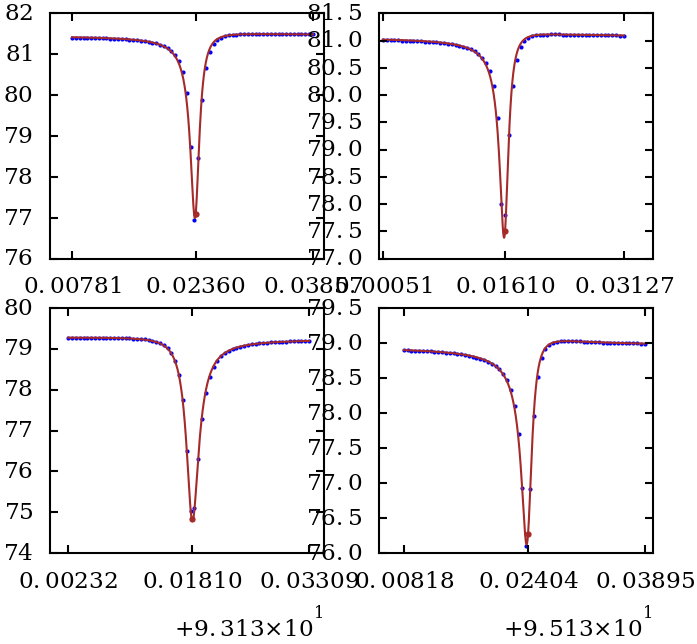

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(3, 3))
for index, ax in enumerate(axes.flatten()):
    amplitude(ax, ssa[index].resonator)

In [9]:
[ssa[n].resonator.Q_i for n in range(4)]

[62901.341439971438, 65324.228492510527, 62228.49580557154, 68820.471256310411]

In [10]:
[ssa[n].resonator.Q_e for n in range(4)]

[(91716.868686145375+16136.494930241257j),
 (119283.45663879665+28355.597314553335j),
 (91774.884803637586-11180.901920415461j),
 (165993.4222824469+56062.602150769904j)]

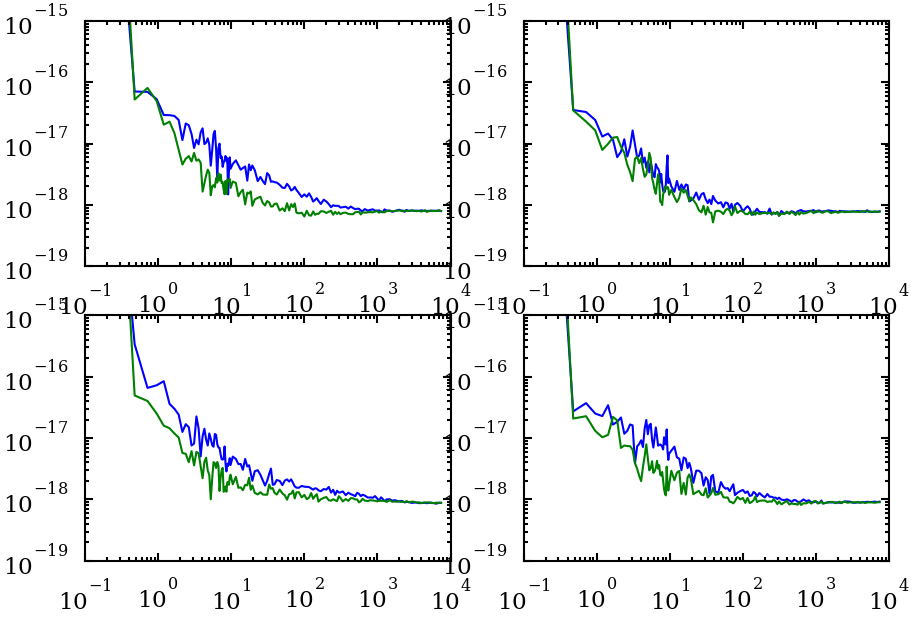

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(4, 3))
for index, ax in enumerate(axes.flatten()):
    sss = ssa[index]
    sss.set_S(window=plt.mlab.window_hanning)
    ax.loglog(sss.S_frequency, sss.S_xx, '-b')
    ax.loglog(sss.S_frequency, sss.S_yy, '-g')
    ax.set_ylim(1e-19, 1e-15);

In [16]:
snap.x.ptp()

131.0

In [17]:
snap.y.ptp()

39.0